In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from database import load_data as ld

In [48]:
%env DB_USER=
%env DB_PASS=
%env DB_HOST=
%env DB_PORT=
%env DB_NAME=


env: DB_USER=
env: DB_PASS=
env: DB_HOST=
env: DB_PORT=
env: DB_NAME=


In [4]:
dfs = []
for table in ["dataset_60s", "dataset_70s", "dataset_80s", "dataset_90s", "dataset_00s", "dataset_10s", "spotify_dataset"]:
    dfs.append(ld.load_sql(table))

dfs

[                                track                       artist  \
 index                                                                
 0               Jealous Kind Of Fella                Garland Green   
 1                       Initials B.B.             Serge Gainsbourg   
 2                        Melody Twist                  Lord Melody   
 3                       Mi Bomba Sonó                   Celia Cruz   
 4                         Uravu Solla                  P. Susheela   
 ...                               ...                          ...   
 8637                  Le ire di Ursus           Giampiero Boneschi   
 8638                            A-B-C                John Zacherle   
 8639                Useless Landscape         Antônio Carlos Jobim   
 8640                Vendedor De Assaí                     Ary Lobo   
 8641   Mambo Simphony - Remasterizado  Orquesta Casino De La Playa   
 
                                         uri  danceability  energy  key  \


In [5]:
num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'valence']
decades = ['60s', '70s', '80s', '90s', '00s', '10s', '20s']
dfs[-1].rename(columns=str.lower, inplace=True)

In [7]:
latest = dfs[-1]
latest

,highest charting position,number of times charted,week of highest charting,song name,streams,artist,artist followers,song id,genre,release date,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration (ms),valence,chord
index,,,,,,,,,,,,,,,,,,,,,
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D


In [13]:
latest['week'] = latest['week of highest charting'].apply(lambda week: '-'.join(week.split('-')[:3]))

In [22]:
latest['week'] = pd.to_datetime(latest['week'])
latest.sort_values(by='week', inplace=True)

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

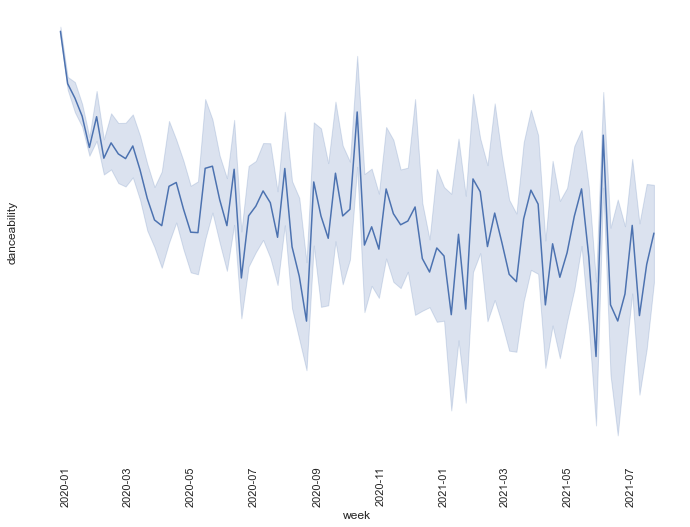

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
lp = sns.lineplot(x='week', y='danceability', data=latest)
lp.set(yticklabels=[])

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

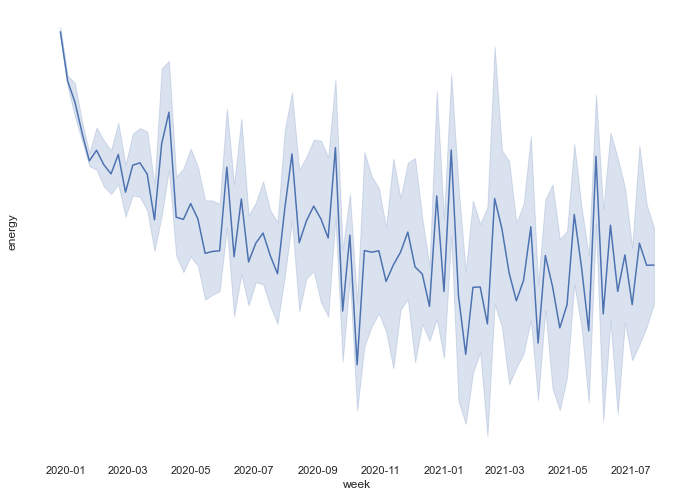

In [50]:
lp = sns.lineplot(x='week', y='energy', data=latest)
lp.set(yticklabels=[])

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

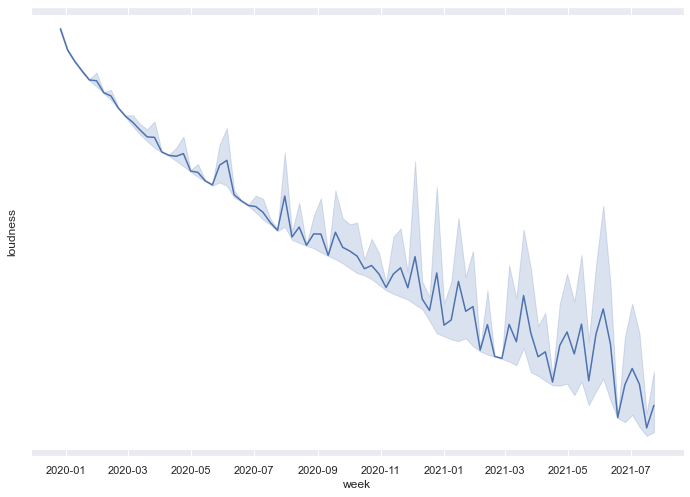

In [51]:
lp = sns.lineplot(x='week', y='loudness', data=latest)
lp.set(yticklabels=[])

In [34]:
latest.columns

Index(['highest charting position', 'number of times charted',
       'week of highest charting', 'song name', 'streams', 'artist',
       'artist followers', 'song id', 'genre', 'release date', 'weeks charted',
       'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'tempo', 'duration (ms)', 'valence',
       'chord', 'week'],
      dtype='object')

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

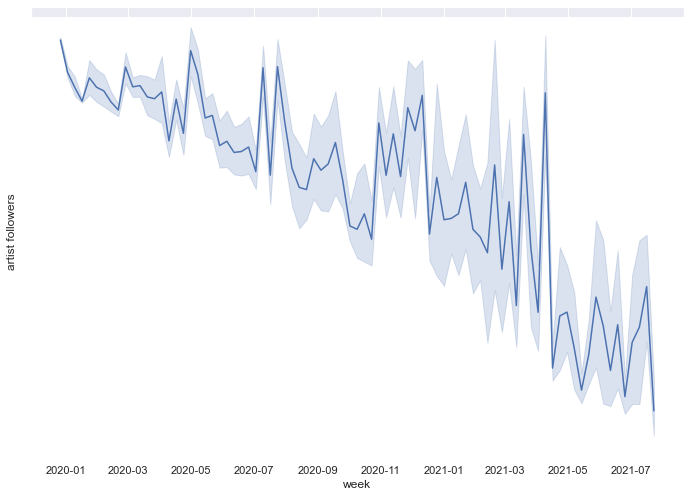

In [52]:
lp = sns.lineplot(x='week', y='artist followers', data=latest)
lp.set(yticklabels=[])

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

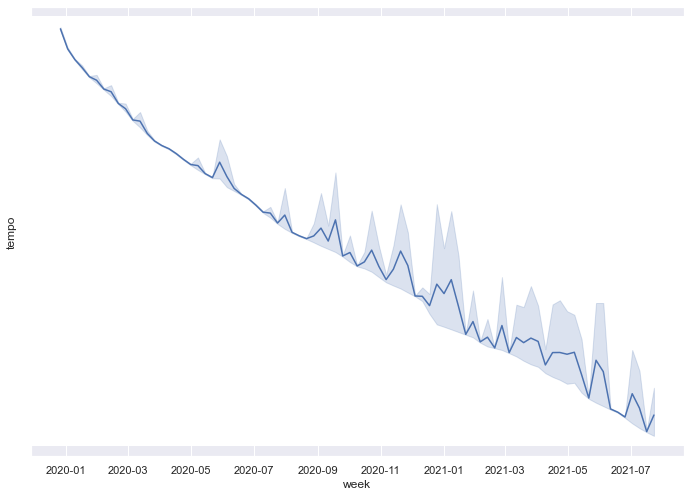

In [53]:
lp = sns.lineplot(x='week', y='tempo', data=latest)
lp.set(yticklabels=[])

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

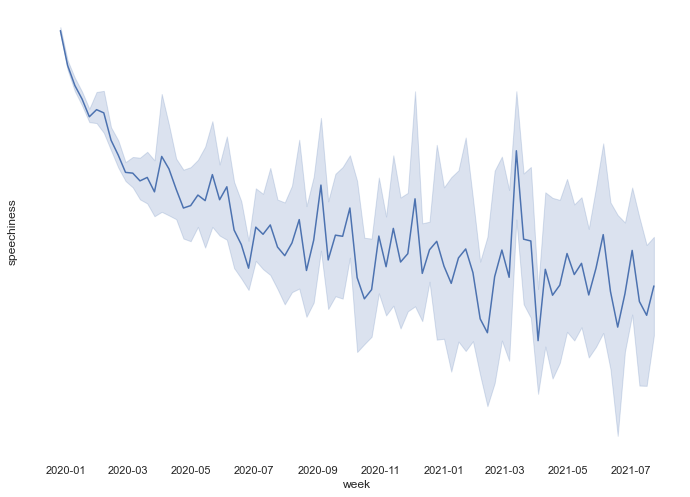

In [54]:
lp = sns.lineplot(x='week', y='speechiness', data=latest)
lp.set(yticklabels=[])

[[Text(0, 0, ''),
  Text(0, 1, ''),
  Text(0, 2, ''),
  Text(0, 3, ''),
  Text(0, 4, ''),
  Text(0, 5, ''),
  Text(0, 6, ''),
  Text(0, 7, ''),
  Text(0, 8, ''),
  Text(0, 9, ''),
  Text(0, 10, ''),
  Text(0, 11, ''),
  Text(0, 12, ''),
  Text(0, 13, ''),
  Text(0, 14, ''),
  Text(0, 15, ''),
  Text(0, 16, ''),
  Text(0, 17, ''),
  Text(0, 18, ''),
  Text(0, 19, ''),
  Text(0, 20, ''),
  Text(0, 21, ''),
  Text(0, 22, ''),
  Text(0, 23, ''),
  Text(0, 24, ''),
  Text(0, 25, ''),
  Text(0, 26, ''),
  Text(0, 27, ''),
  Text(0, 28, ''),
  Text(0, 29, ''),
  Text(0, 30, ''),
  Text(0, 31, ''),
  Text(0, 32, ''),
  Text(0, 33, ''),
  Text(0, 34, ''),
  Text(0, 35, ''),
  Text(0, 36, ''),
  Text(0, 37, ''),
  Text(0, 38, ''),
  Text(0, 39, ''),
  Text(0, 40, ''),
  Text(0, 41, ''),
  Text(0, 42, ''),
  Text(0, 43, ''),
  Text(0, 44, ''),
  Text(0, 45, ''),
  Text(0, 46, ''),
  Text(0, 47, ''),
  Text(0, 48, ''),
  Text(0, 49, ''),
  Text(0, 50, ''),
  Text(0, 51, ''),
  Text(0, 52, ''),
  T

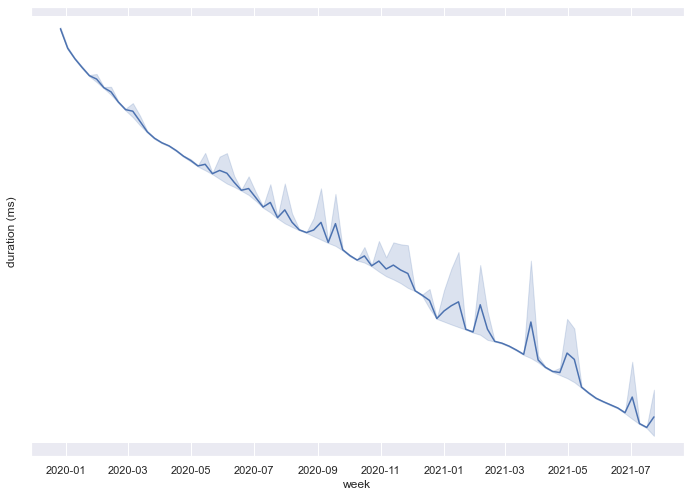

In [55]:
lp = sns.lineplot(x='week', y='duration (ms)', data=latest)
lp.set(yticklabels=[])